## Links for Datasets

In [ ]:
# https://medium.com/@sudiplaudari/yolov10-a-step-by-step-guide-to-object-detection-on-a-custom-dataset-9f3e3e56921c -- yolo preprocessing article
# https://www.kaggle.com/datasets/vencerlanz09/taco-dataset-yolo-format -- taco dataset

In [ ]:
#hi there pls do work nigga(Slut)

## Installing Packages

Connecting to drive for efficient storage

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Dowload and Transfer dataset to google drive

In [ ]:
! kaggle datasets download vencerlanz09/taco-dataset-yolo-format

Dataset URL: https://www.kaggle.com/datasets/vencerlanz09/taco-dataset-yolo-format
License(s): other
 96% 222M/232M [00:02<00:00, 98.6MB/s]
100% 232M/232M [00:02<00:00, 99.1MB/s]


In [ ]:
zip_file_path = '/content/taco-dataset-yolo-format.zip'  # Path to your zip file in Colab
destination_folder = '/content/drive/My Drive/Waste Detection and Classification/'  # Destination folder in Google Drive

# Create the destination folder if it doesn't exist
!mkdir -p "$destination_folder"

# Step 3: Unzip the file
!unzip -q "$zip_file_path" -d "$destination_folder"

print("Unzip completed successfully!")

Unzip completed successfully!


## Code for Dataset Training

Importing Packages

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
import shutil
from shutil import copyfile
import matplotlib.pyplot as plt
from matplotlib import animation, rc
rc('animation', html='jshtml')
from PIL import Image

import ultralytics
from ultralytics import YOLO
ultralytics.checks()

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


Setting up and Training Model

In [ ]:
#model = YOLO("yolov10x.pt")
model1 = YOLO('/content/drive/My Drive/Waste Detection and Classification/custom_checkpoints/waste_detection/weights/best.pt')

In [ ]:
!yolo task=detect mode=train model='/content/drive/My Drive/Waste Detection and Classification/custom_checkpoints/waste_detection4/weights/best.pt' data='/content/drive/My Drive/Waste Detection and Classification/data.yaml' epochs=50 imgsz=512 save_period=3 project='/content/drive/My Drive/Waste Detection and Classification/custom_checkpoints' name='waste_detection'

Ultralytics 8.3.37 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/My Drive/Waste Detection and Classification/custom_checkpoints/waste_detection4/weights/best.pt, data=/content/drive/My Drive/Waste Detection and Classification/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=512, save=True, save_period=3, cache=False, device=None, workers=8, project=/content/drive/My Drive/Waste Detection and Classification/custom_checkpoints, name=waste_detection5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False

# **RESULT GRAPHS**

Combined CSV file saved to: combined_epochs_map.csv


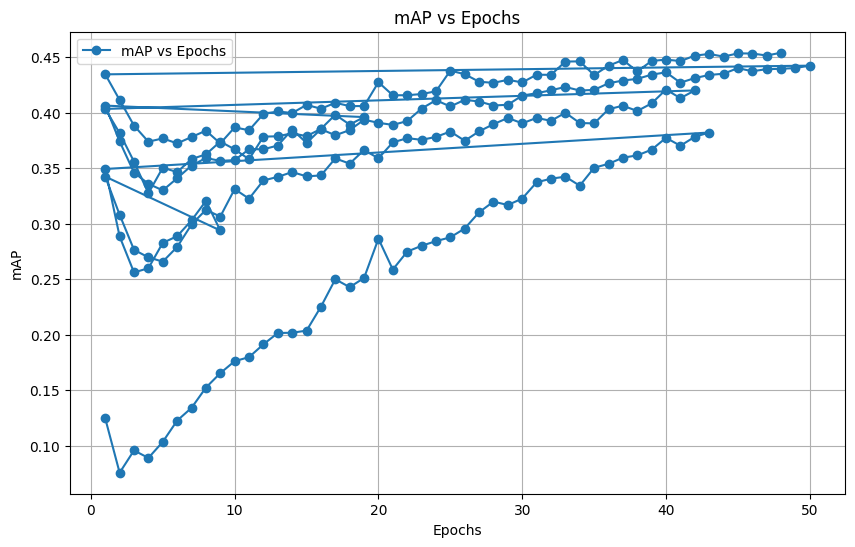

In [ ]:
#individual in particular
import os
import pandas as pd
import matplotlib.pyplot as plt

# Folder containing the CSV files
input_folder = "/content/drive/My Drive/Waste Detection and Classification/results"
output_csv = "combined_epochs_map.csv"

# List to store data from all CSV files
all_data = []

# Iterate through all CSV files in the folder
for filename in os.listdir(input_folder):
    if filename.endswith(".csv"):
        file_path = os.path.join(input_folder, filename)

        # Read the CSV file
        df = pd.read_csv(file_path)

        # Ensure required columns exist
        if "epoch" in df.columns and "metrics/mAP50(B)" in df.columns:
            all_data.append(df[["epoch", "metrics/mAP50(B)"]])

# Combine all data into a single DataFrame
combined_df = pd.concat(all_data, ignore_index=True)

# Save the combined data to a new CSV file
combined_df.to_csv(output_csv, index=False)
print(f"Combined CSV file saved to: {output_csv}")

# Plot mAP vs epoch
plt.figure(figsize=(10, 6))
plt.plot(combined_df["epoch"], combined_df["metrics/mAP50(B)"], label="mAP vs Epochs", marker="o")
plt.xlabel("Epochs")
plt.ylabel("mAP")
plt.title("mAP vs Epochs")
plt.legend()
plt.grid()
plt.show()

#train/box_loss
# all_loss_data = []
# for filename in os.listdir(input_folder):
#     if filename.endswith(".csv"):
#         file_path = os.path.join(input_folder, filename)
#         df = pd.read_csv(file_path)
#         if "epoch" in df.columns and "train/box_loss" in df.columns:
#             all_loss_data.append(df[["epoch", "train/box_loss"]])

# if all_loss_data:
#     loss_df = pd.concat(all_loss_data, ignore_index=True)
#     plt.figure(figsize=(10, 6))
#     plt.plot(loss_df["epoch"], loss_df["train/box_loss"], label="Loss vs Epochs", color="r", marker="x")
#     plt.xlabel("Epochs")
#     plt.ylabel("train/box_loss")
#     plt.title("train/box_loss vs Epochs")
#     plt.legend()
#     plt.grid()
#     plt.show()

# #train/cls_loss
# all_loss_data = []
# for filename in os.listdir(input_folder):
#     if filename.endswith(".csv"):
#         file_path = os.path.join(input_folder, filename)
#         df = pd.read_csv(file_path)
#         if "epoch" in df.columns and "train/cls_loss" in df.columns:
#             all_loss_data.append(df[["epoch", "train/cls_loss"]])

# if all_loss_data:
#     loss_df = pd.concat(all_loss_data, ignore_index=True)
#     plt.figure(figsize=(10, 6))
#     plt.plot(loss_df["epoch"], loss_df["train/cls_loss"], label="train/cls_loss vs Epochs", color="r", marker="x")
#     plt.xlabel("Epochs")
#     plt.ylabel("train/cls_loss")
#     plt.title("train/cls_loss vs Epochs")
#     plt.legend()
#     plt.grid()
#     plt.show()

# #train/dfl_loss
# all_loss_data = []
# for filename in os.listdir(input_folder):
#     if filename.endswith(".csv"):
#         file_path = os.path.join(input_folder, filename)
#         df = pd.read_csv(file_path)
#         if "epoch" in df.columns and "train/dfl_loss" in df.columns:
#             all_loss_data.append(df[["epoch", "train/dfl_loss"]])

# if all_loss_data:
#     loss_df = pd.concat(all_loss_data, ignore_index=True)
#     plt.figure(figsize=(10, 6))
#     plt.plot(loss_df["epoch"], loss_df["train/dfl_loss"], label="train/dfl_loss vs Epochs", color="r", marker="x")
#     plt.xlabel("Epochs")
#     plt.ylabel("train/dfl_loss")
#     plt.title("train/dfl_loss vs Epochs")
#     plt.legend()
#     plt.grid()
#     plt.show()

#metrics/precision(B)

**SAMRAATS YOLO10**

Combined CSV file saved to: combined_epochs_all.csv


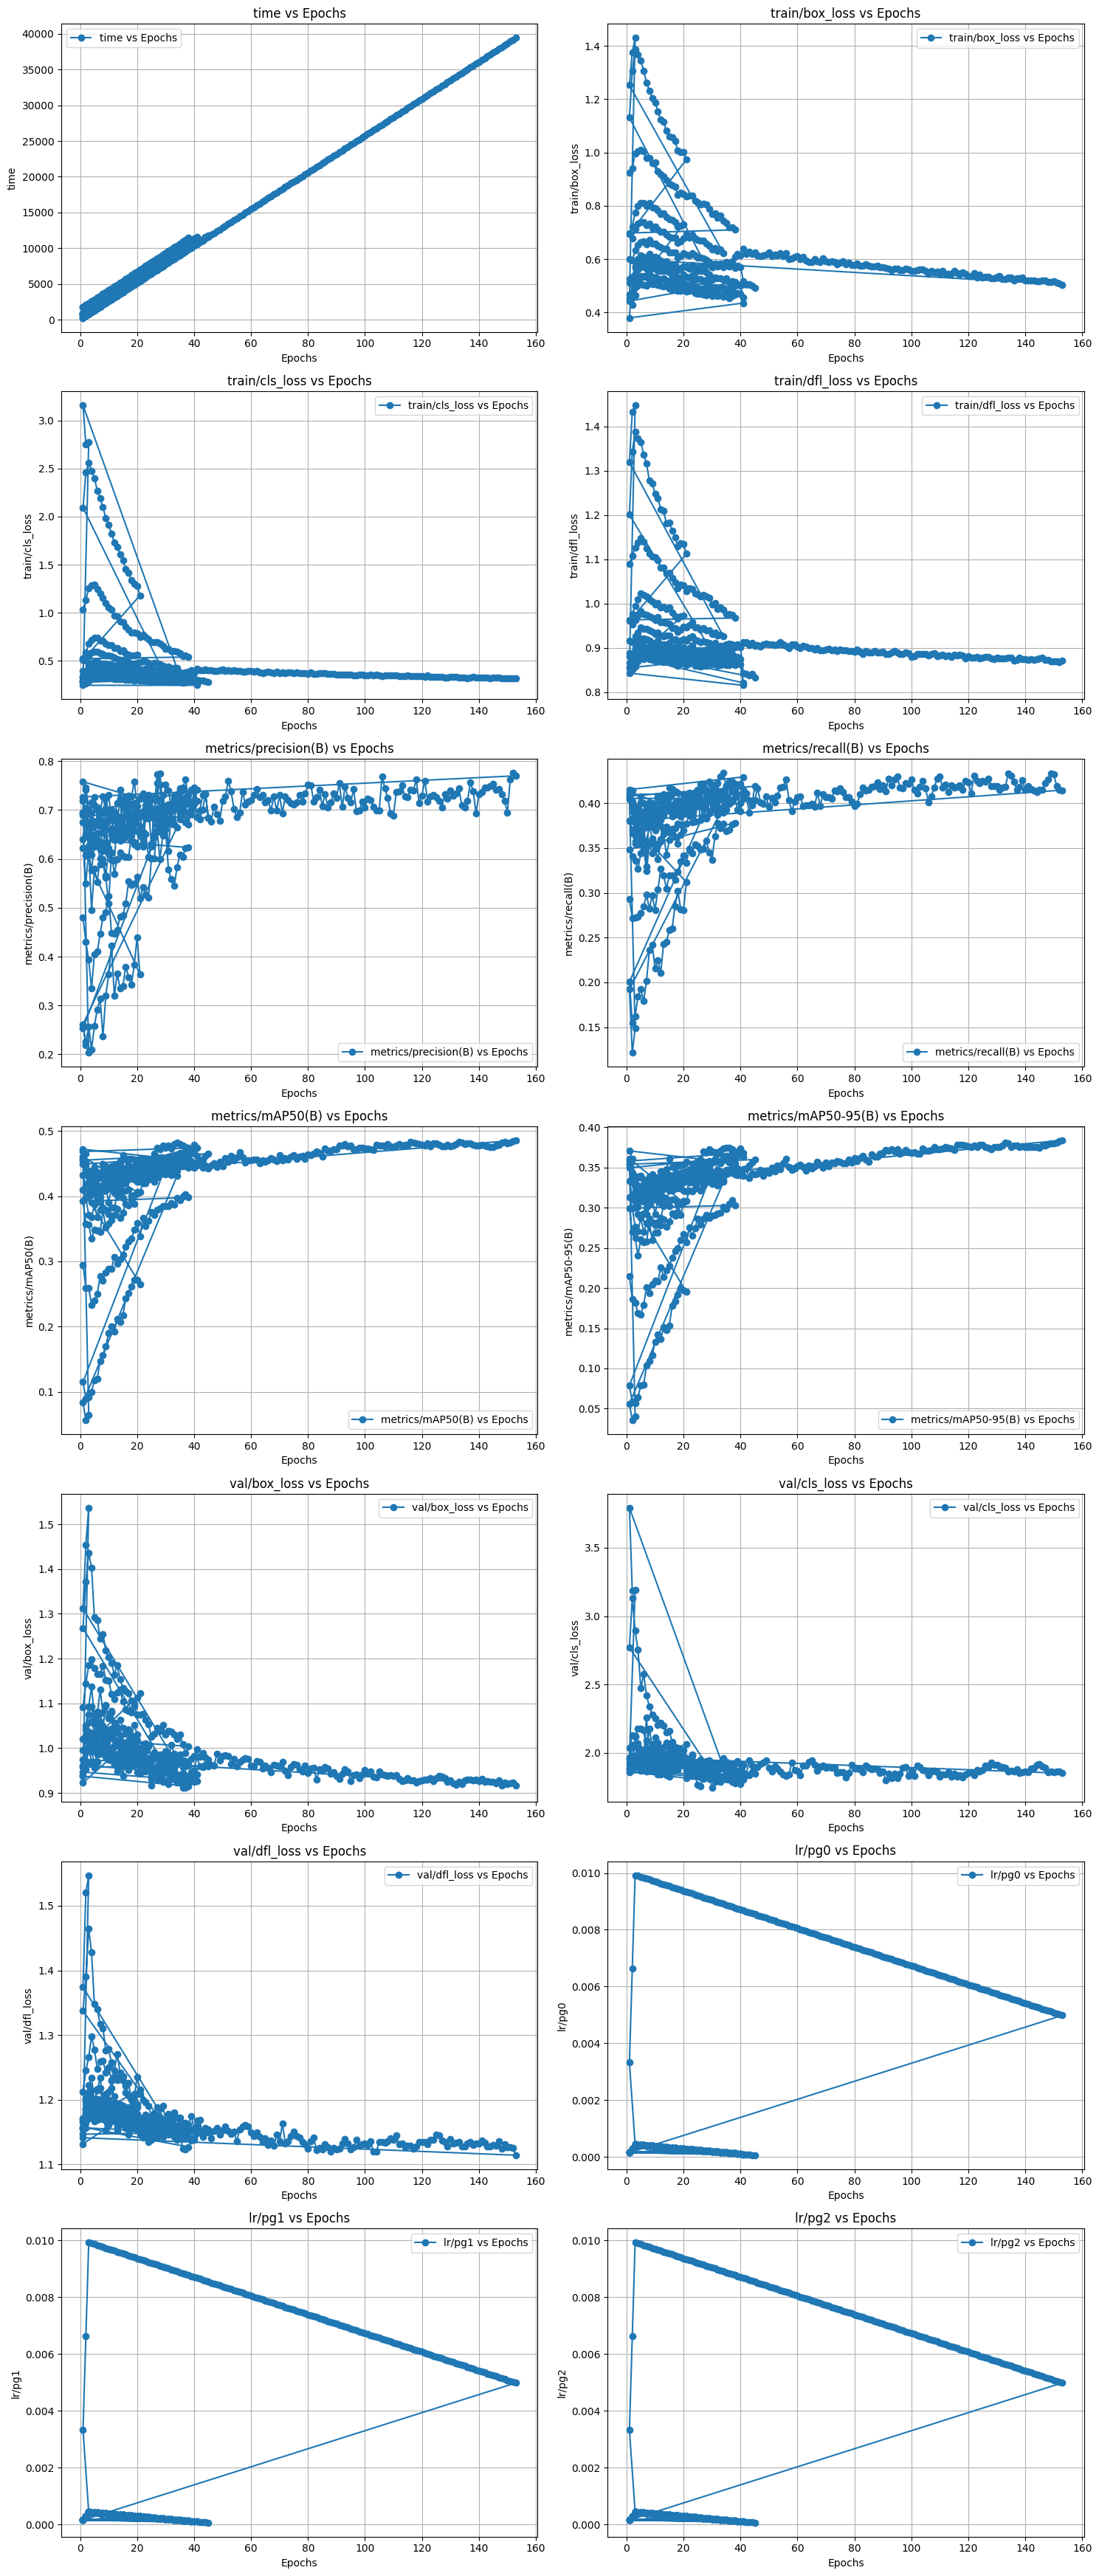

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Folder containing the CSV files
input_folder = "/content/drive/MyDrive/Waste Detection and Classification/results_from_training/Results from Training"
output_csv = "combined_epochs_all.csv"

# List to store data from all CSV files
all_data = []

# Iterate through all CSV files in the folder
for filename in os.listdir(input_folder):
    if filename.endswith(".csv"):
        file_path = os.path.join(input_folder, filename)

        # Read the CSV file
        df = pd.read_csv(file_path)

        # Ensure "epoch" column exists
        if "epoch" in df.columns:
            all_data.append(df)
#print(all_data)
# Combine all data into a single DataFrame
if all_data:
    combined_df = pd.concat(all_data, ignore_index=True)
    #print(combined_df.head())

    # Save the combined data to a new CSV file
    combined_df.to_csv(output_csv, index=False)
    print(f"Combined CSV file saved to: {output_csv}")

    # Plot graphs for all columns against epoch
    columns_to_plot = [col for col in combined_df.columns if col != "epoch"]

    # Create subplots for all graphs
    num_columns = len(columns_to_plot)
    fig, axes = plt.subplots(nrows=(num_columns + 1) // 2, ncols=2, figsize=(15, 5 * ((num_columns + 1) // 2)))
    axes = axes.flatten()

    for idx, column in enumerate(columns_to_plot):
        axes[idx].plot(combined_df["epoch"], combined_df[column], label=f"{column} vs Epochs", marker="o")
        axes[idx].set_xlabel("Epochs")
        axes[idx].set_ylabel(column)
        axes[idx].set_title(f"{column} vs Epochs")
        axes[idx].legend()
        axes[idx].grid()

    # Hide unused subplots if any
    for ax in axes[len(columns_to_plot):]:
        ax.set_visible(False)

    plt.tight_layout()
    plt.show()
else:
    print("No valid data found in the folder. Please check your CSV files.")

**YOLO 11 STUFF**

Combined CSV file saved to: combined_epochs_all.csv


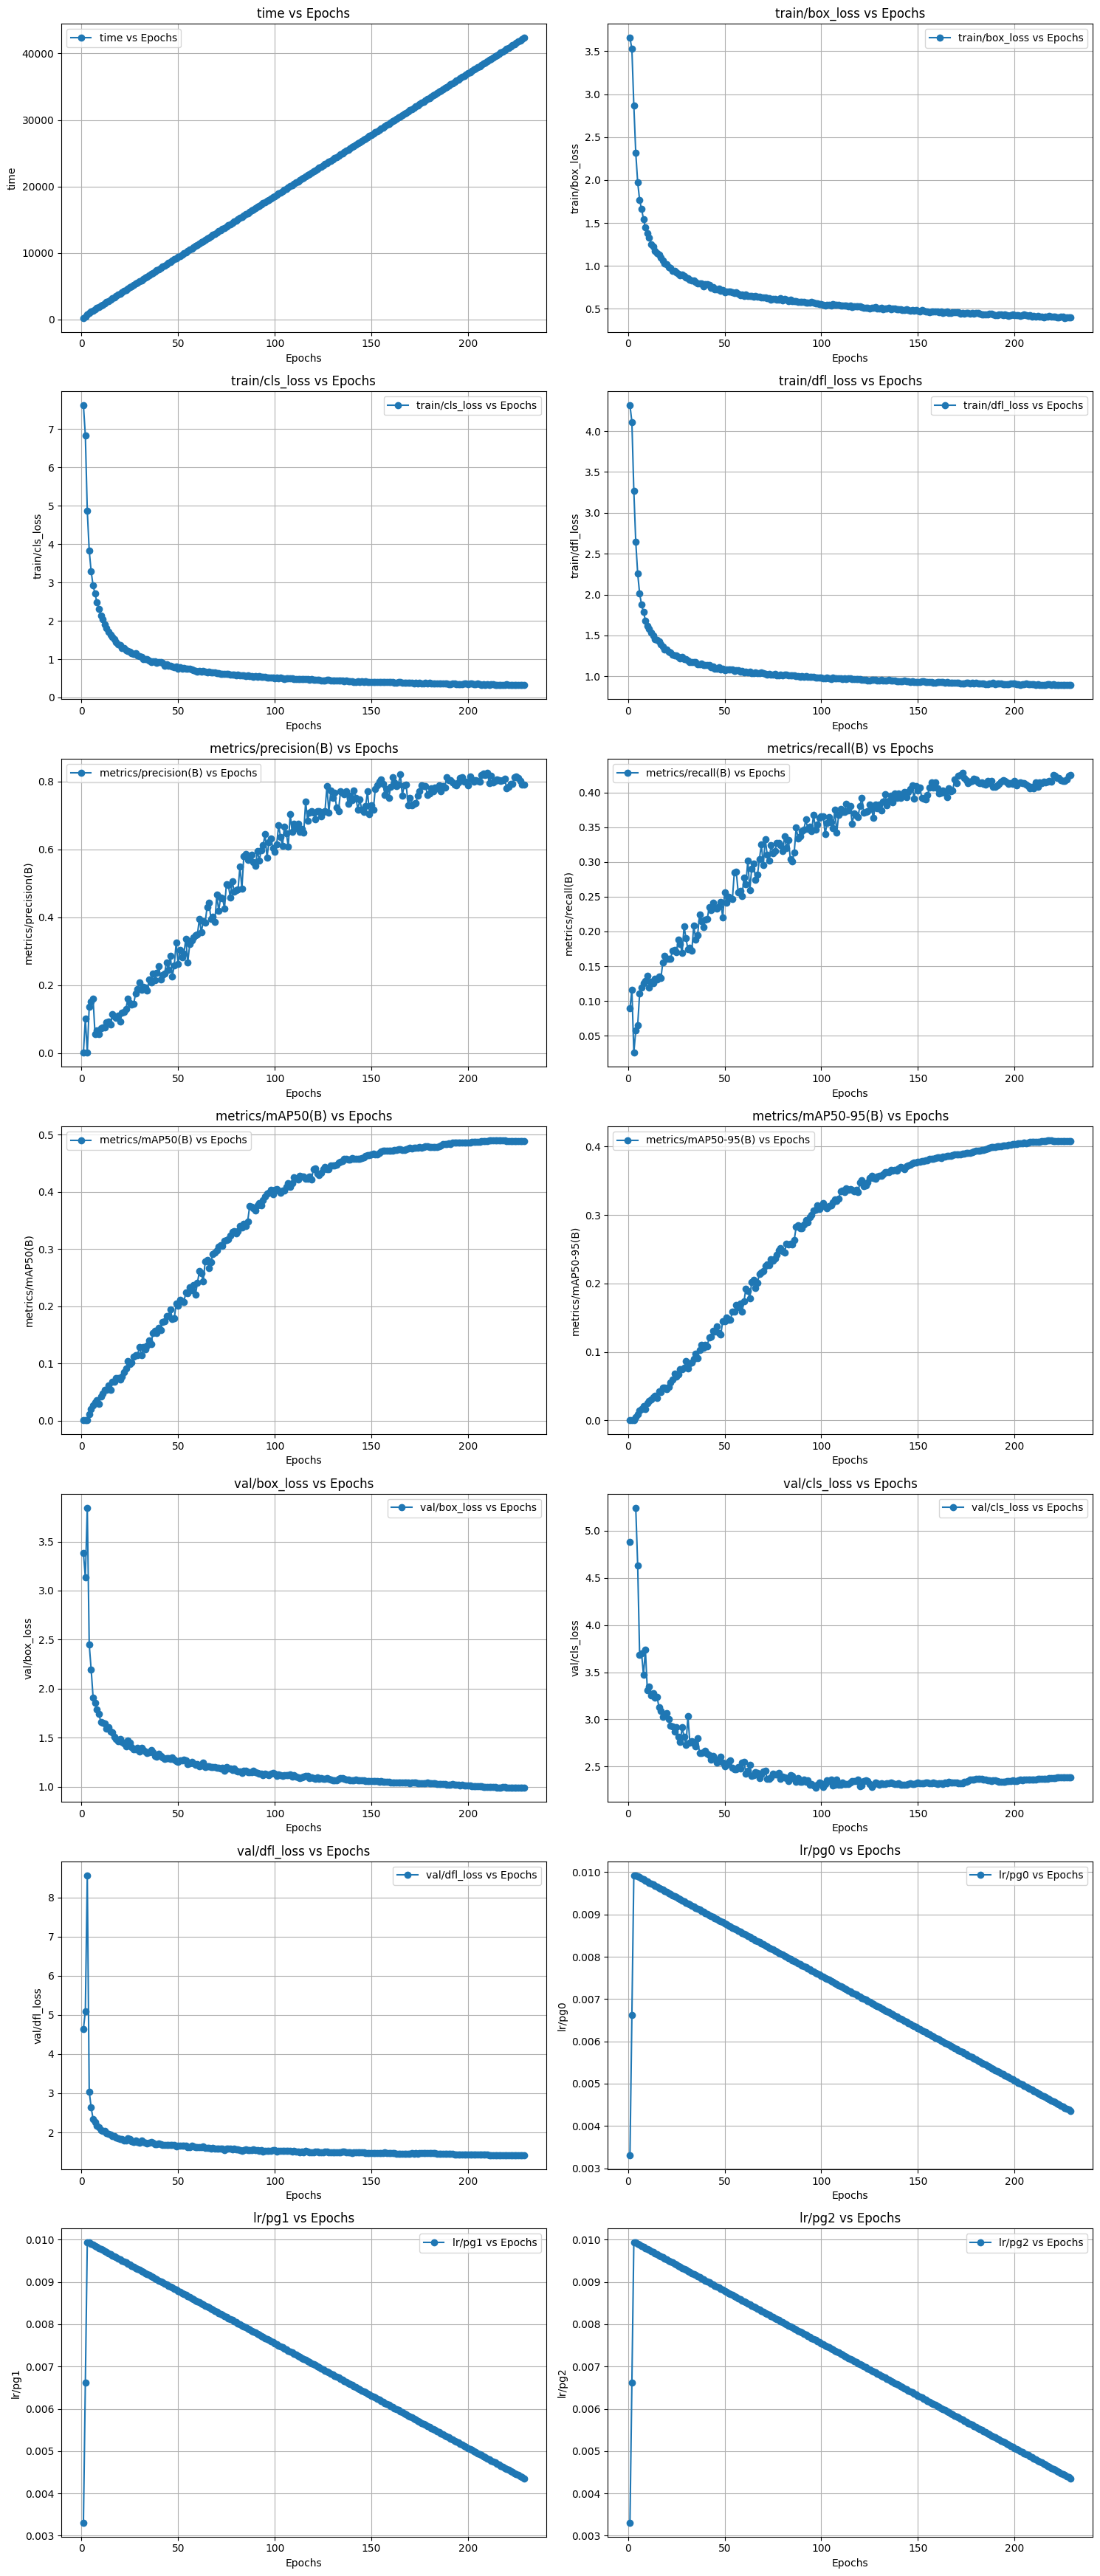

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Folder containing the CSV files
input_folder = "/content/drive/MyDrive/Waste Detection and Classification/results2"
output_csv = "combined_epochs_all.csv"

# List to store data from all CSV files
all_data = []

# Iterate through all CSV files in the folder
for filename in os.listdir(input_folder):
    if filename.endswith(".csv"):
        file_path = os.path.join(input_folder, filename)

        # Read the CSV file
        df = pd.read_csv(file_path)

        # Ensure "epoch" column exists
        if "epoch" in df.columns:
            all_data.append(df)
#print(all_data)
# Combine all data into a single DataFrame
if all_data:
    combined_df = pd.concat(all_data, ignore_index=True)
    #print(combined_df.head())

    # Save the combined data to a new CSV file
    combined_df.to_csv(output_csv, index=False)
    print(f"Combined CSV file saved to: {output_csv}")

    # Plot graphs for all columns against epoch
    columns_to_plot = [col for col in combined_df.columns if col != "epoch"]

    # Create subplots for all graphs
    num_columns = len(columns_to_plot)
    fig, axes = plt.subplots(nrows=(num_columns + 1) // 2, ncols=2, figsize=(15, 5 * ((num_columns + 1) // 2)))
    axes = axes.flatten()

    for idx, column in enumerate(columns_to_plot):
        axes[idx].plot(combined_df["epoch"], combined_df[column], label=f"{column} vs Epochs", marker="o")
        axes[idx].set_xlabel("Epochs")
        axes[idx].set_ylabel(column)
        axes[idx].set_title(f"{column} vs Epochs")
        axes[idx].legend()
        axes[idx].grid()

    # Hide unused subplots if any
    for ax in axes[len(columns_to_plot):]:
        ax.set_visible(False)

    plt.tight_layout()
    plt.show()
else:
    print("No valid data found in the folder. Please check your CSV files.")